In [1]:
import numpy as np
import pylab as plt
import xarray as xr
from datetime import datetime

In [2]:
# https://github.com/ecjoliver/marineHeatWaves/blob/master/marineHeatWaves.py
import marineHeatWaves as mhw

In [3]:
print( xr.__version__)

0.16.0


In [4]:
prep_data=False
if prep_data:
    uk1 = xr.open_mfdataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK*ssp126.nc')
    uk1 = uk1.resample({'time':'D'}).mean()
    uk1 = uk1.drop_dims('bnds')
    

In [5]:
uk1 = xr.open_dataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK_ssp126_resample_to_daily.nc', chunks={'time':120})
ssp126 = uk1.isel(lat=[2], lon=[3])
ssp126 = ssp126.to_dataframe()
ssp126.reset_index(inplace=True) 

cfdates = xr.cftime_range(start="2015-01-01", end="2099-12-30", freq="D", calendar="360_day")
ssp126 = ssp126[ssp126.bnds==0]
dates=[]
tas126=[]
t=[]
for i in range(0, len(cfdates)):
    try:
        dates.append(np.datetime64(cfdates[i]).astype('datetime64[D]'))
        tas126.append (ssp126.tas[i])
    except:
        pass
tas126= np.array(tas126)
tas126 = tas126-273.15
dates = np.array(dates).astype(datetime)
for i in range(0, len(dates)):
    t.append(dates[i].toordinal())
t=np.array(t)
mhws126, clim126 = mhw.detect(t, tas126, climatologyPeriod=[2015,2030], pctile=95., Ly=365)
print('n events', mhws126['n_events'])
ev126 = np.argmax(mhws126['intensity_max']) # Find largest event
print ('Maximum intensity:', mhws126['intensity_max'][ev126], 'deg. C')
print ('Average intensity:', mhws126['intensity_mean'][ev126], 'deg. C')
print ('Cumulative intensity:', mhws126['intensity_cumulative'][ev126], 'deg. C-days')
print ('Duration:', mhws126['duration'][ev126], 'days')
print ('Start date:', mhws126['date_start'][ev126].strftime("%d %B %Y"))
print ('End date:', mhws126['date_end'][ev126].strftime("%d %B %Y"))

n events 185
Maximum intensity: 8.686861745772823 deg. C
Average intensity: 4.900987013266506 deg. C
Cumulative intensity: 176.43553247759422 deg. C-days
Duration: 36 days
Start date: 10 June 2050
End date: 15 July 2050


In [7]:
if prep_data:
    uk2 = xr.open_mfdataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK*ssp585.nc')
    uk2 = uk2.resample({'time':'D'}).mean()
    uk2 = uk2.drop_dims('bnds')
    uk2.to_netcdf('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK_ssp585_resample_to_daily.nc')


In [8]:
uk2 = xr.open_dataset('/Users/ptg21/data/CMIP6_processed_data/CMIP_tas/UK_ssp585_resample_to_daily.nc', chunks={'time':120})
ssp585 = uk2.isel(lat=[2], lon=[3])
ssp585 = ssp585.to_dataframe()
ssp585.reset_index(inplace=True) 

ssp585 = ssp585[ssp585.bnds==0]
dates=[]
tas585=[]
t=[]
for i in range(0, len(cfdates)):
    try:
        dates.append(np.datetime64(cfdates[i]).astype('datetime64[D]'))
        tas585.append (ssp585.tas[i])
    except:
        pass
tas585= np.array(tas585)
tas585 = tas585-273.15
dates = np.array(dates).astype(datetime)
for i in range(0, len(dates)):
    t.append(dates[i].toordinal())
t=np.array(t)
mhws585, clim585 = mhw.detect(t, tas585, climatologyPeriod=[2015,2030], pctile=95., Ly=365)
print('n events', mhws585['n_events'])

mhws585['intensity_max'][0:10]

ev585 = np.argmax(mhws585['intensity_max']) # Find largest event
print ('Maximum intensity:', mhws585['intensity_max'][ev585], 'deg. C')
print ('Average intensity:', mhws585['intensity_mean'][ev585], 'deg. C')
print ('Cumulative intensity:', mhws585['intensity_cumulative'][ev585], 'deg. C-days')
print ('Duration:', mhws585['duration'][ev585], 'days')
print ('Start date:', mhws585['date_start'][ev585].strftime("%d %B %Y"))
print ('End date:', mhws585['date_end'][ev585].strftime("%d %B %Y"))

n events 403
Maximum intensity: 11.184936092745872 deg. C
Average intensity: 5.72669146522399 deg. C
Cumulative intensity: 595.575912383295 deg. C-days
Duration: 104 days
Start date: 12 July 2079
End date: 25 October 2079


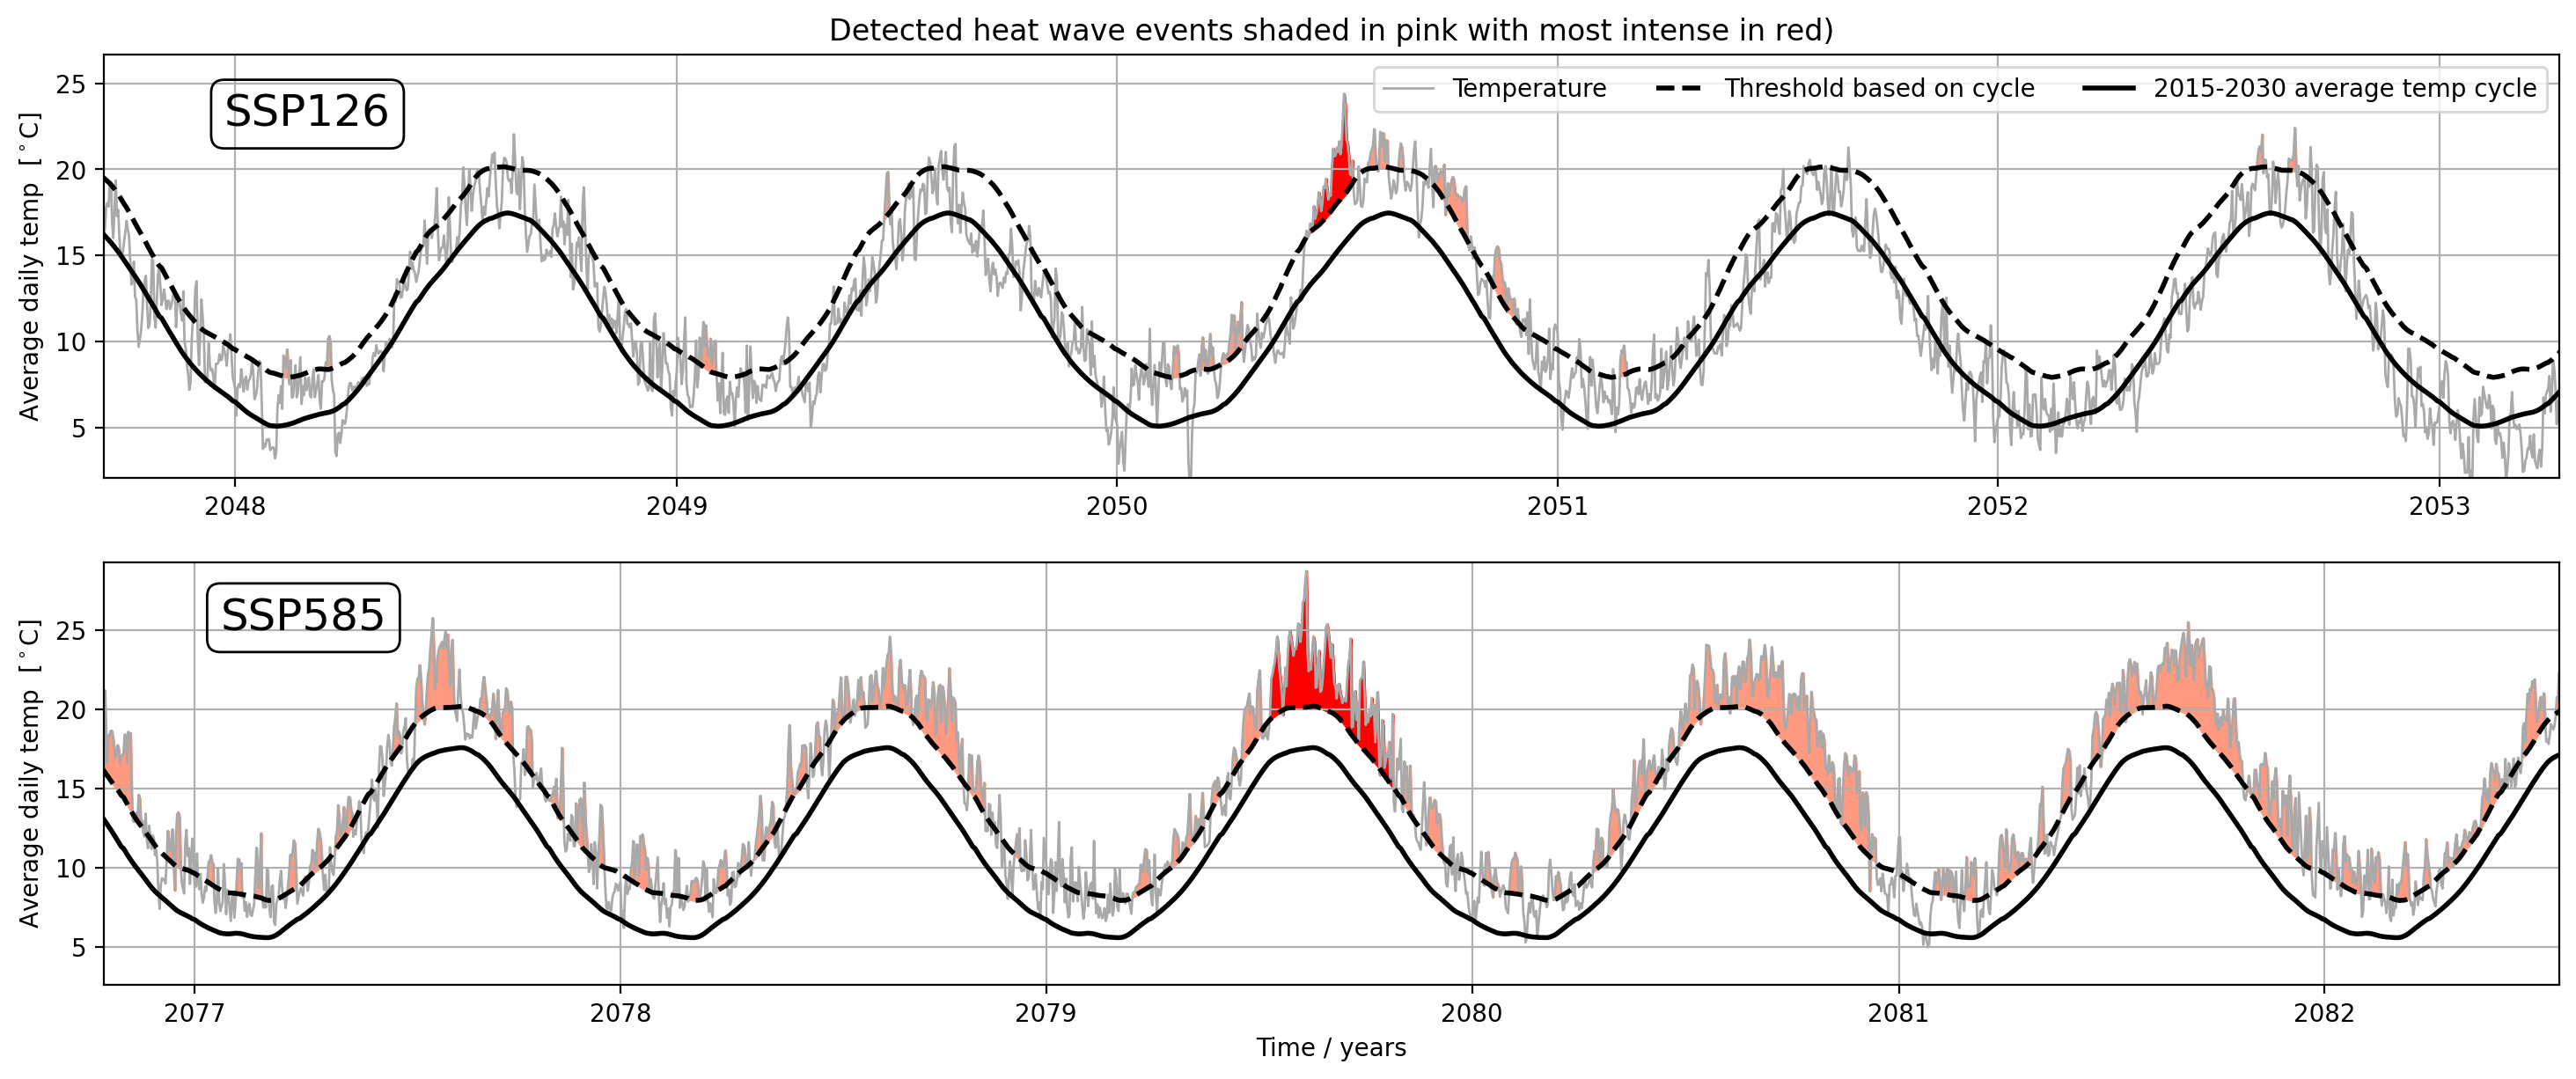

In [9]:
plt.figure(figsize=(18,7), dpi=200)
plt.subplot(2,1,1)
plt.title('Detected heat wave events shaded in pink with most intense in red)');
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev126-50, ev126+50, 1):
    t1 = np.where(t==mhws126['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws126['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], tas126[t1:t2+1], clim126['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws126['time_start'][ev126])[0][0]
t2 = np.where(t==mhws126['time_end'][ev126])[0][0]
plt.fill_between(dates[t1:t2+1], tas126[t1:t2+1], clim126['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, tas126, '-',color='darkgray', linewidth=1, label='Temperature')
plt.plot(dates, clim126['thresh'], '--', color='black', linewidth=2, label='Threshold based on cycle')
plt.plot(dates, clim126['seas'], '-',color='black', linewidth=2, label='2015-2030 average temp cycle' )
plt.legend(ncol=3)
plt.xlim(mhws126['time_start'][ev126]-1000, mhws126['time_end'][ev126]+1000)
plt.ylim(clim126['seas'].min() - 3, clim126['seas'].max() + mhws126['intensity_max'][ev126] + 0.5)
plt.grid(True)
plt.ylabel(r'Average daily temp  [$^\circ$C]')
plt.text(mhws126['time_start'][ev126]-900, 22.5, 'SSP126', fontsize=18, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))
plt.subplot(2,1,2)
# Find indices for all ten MHWs before and after event of interest and shade accordingly
for ev0 in np.arange(ev585-50, ev585+50, 1):
    t1 = np.where(t==mhws585['time_start'][ev0])[0][0]
    t2 = np.where(t==mhws585['time_end'][ev0])[0][0]
    plt.fill_between(dates[t1:t2+1], tas585[t1:t2+1], clim585['thresh'][t1:t2+1], \
                     color=(1,0.6,0.5))
# Find indices for MHW of interest and shade accordingly
t1 = np.where(t==mhws585['time_start'][ev585])[0][0]
t2 = np.where(t==mhws585['time_end'][ev585])[0][0]
plt.fill_between(dates[t1:t2+1], tas585[t1:t2+1], clim585['thresh'][t1:t2+1], \
                 color='r')
# Plot SST, seasonal cycle, threshold, shade MHWs with main event in red
plt.plot(dates, tas585, '-',color='darkgray', linewidth=1)
plt.plot(dates, clim585['thresh'], '--', color='black', linewidth=2)
plt.plot(dates, clim585['seas'], '-',color='black', linewidth=2)

plt.xlim(mhws585['time_start'][ev585]-1000, mhws585['time_end'][ev585]+1000)
plt.ylim(clim585['seas'].min() - 3, clim585['seas'].max() + mhws585['intensity_max'][ev585] + 0.5)
plt.xlabel('Time / years')
plt.grid(True)
plt.ylabel(r'Average daily temp  [$^\circ$C]');
#plt.tight_layout()
plt.text(mhws585['time_start'][ev585]-900, 25, 'SSP585', fontsize=18, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'));

In [10]:
import pandas as pd
pd.set_option('plotting.backend', 'pandas_bokeh')

In [17]:
data = {'xs': [dates, dates],
        'ys': [ssp126['tas']-273.15, ssp585['tas']-273.15],
        'labels': ['SSP126', 'SSP585'],
       'colors':['red','slateblue'],
       'alphas':[1.0, 0.5],
       'line_width':[1,0.5]}
from bokeh.models import ColumnDataSource
source = ColumnDataSource(data)
output_file("ssps.html")
p = figure(width=600, height=400, hidpi=True, x_axis_type='datetime')
p.multi_line(xs='xs', ys='ys', legend='labels', source=source, line_color = 'colors', line_alpha='alphas', line_width = 'line_width')
p.legend.location = "bottom_left"

show(p)